In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

In [2]:
fp = "data.csv
df = pd.read_csv(fp)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13604 entries, 0 to 13603
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   soz_id           13604 non-null  int64 
 1   sozum            13604 non-null  object
 2   atara            13604 non-null  object
 3   anlami           13604 non-null  object
 4   anahtar          13353 non-null  object
 5   turu2            13604 non-null  object
 6   gosterim_tarihi  2 non-null      object
dtypes: int64(1), object(6)
memory usage: 744.1+ KB


In [3]:
print(df.describe(include='all'))


              soz_id             sozum                   atara  anlami  \
count   13604.000000             13604                   13604   13604   
unique           NaN             13579                   13601   13130   
top              NaN  ismi lazım değil   ismi lazım değil isim  ölmek.   
freq             NaN                 2                       2      11   
mean     6803.177668               NaN                     NaN     NaN   
std      3927.659228               NaN                     NaN     NaN   
min         1.000000               NaN                     NaN     NaN   
25%      3401.750000               NaN                     NaN     NaN   
50%      6803.500000               NaN                     NaN     NaN   
75%     10204.250000               NaN                     NaN     NaN   
max     13605.000000               NaN                     NaN     NaN   

       anahtar  turu2 gosterim_tarihi  
count    13353  13604               2  
unique    5435      2          

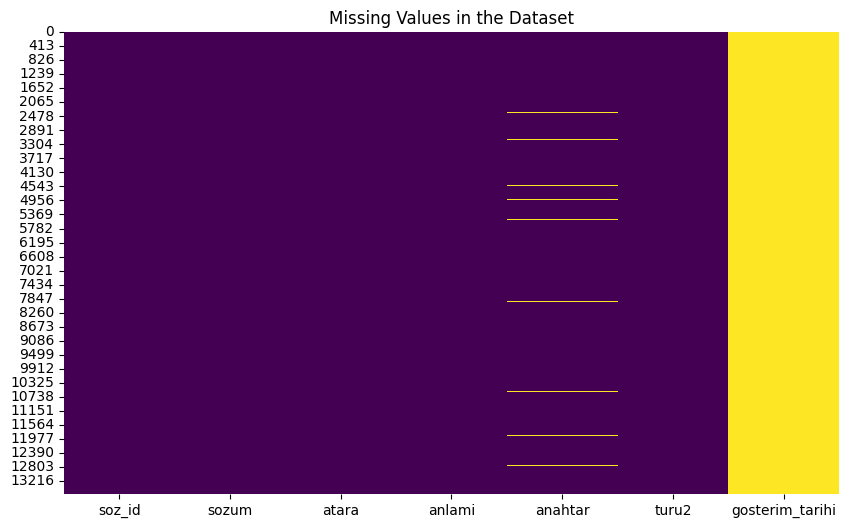

In [4]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Dataset')
plt.show()

In [19]:
df['anahtar'].fillna('', inplace=True)

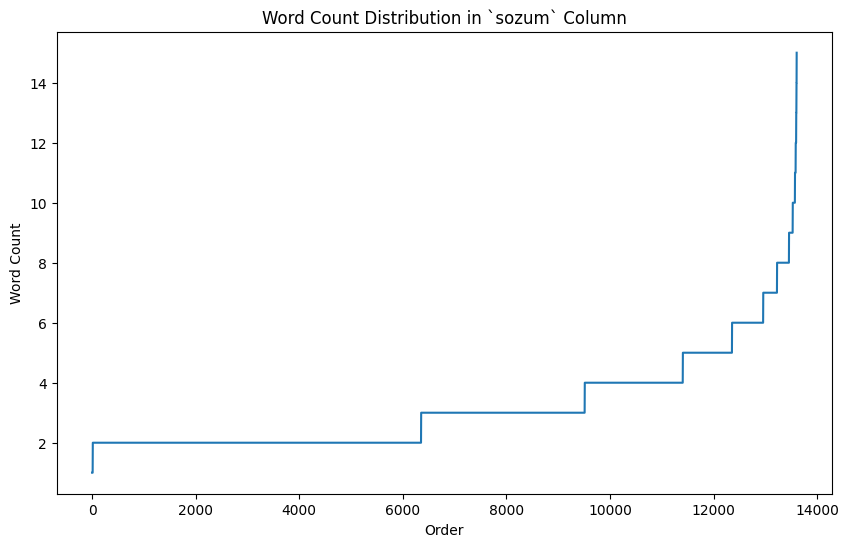

In [20]:
word_count = sorted([len(text.split()) for text in df['sozum']])
plt.figure(figsize=(10, 6))
plt.plot(word_count)
plt.xlabel('Order')
plt.ylabel('Word Count')
plt.title('Word Count Distribution in `sozum` Column')
plt.show()

In [21]:
# Most common words in `sozum`
all_words = ' '.join(df['sozum']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_26292\1479781997.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


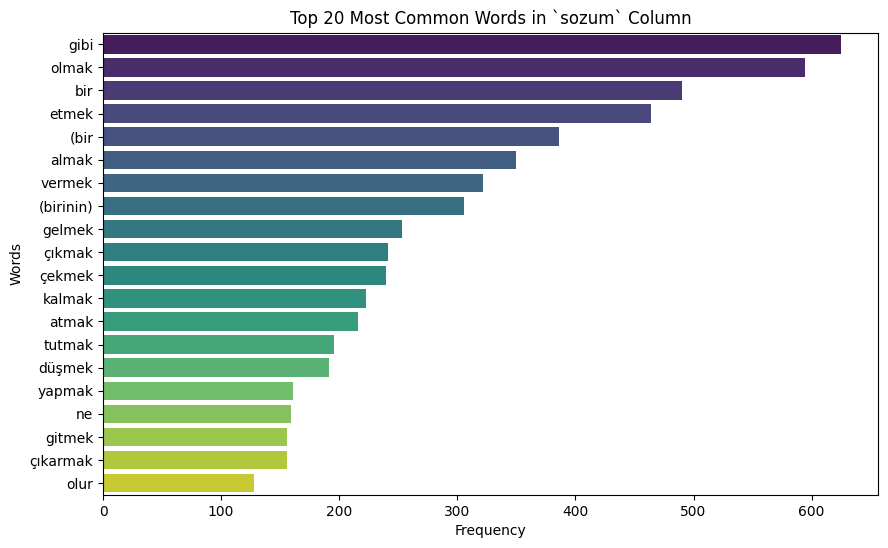

In [22]:
words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Most Common Words in `sozum` Column')
plt.show()

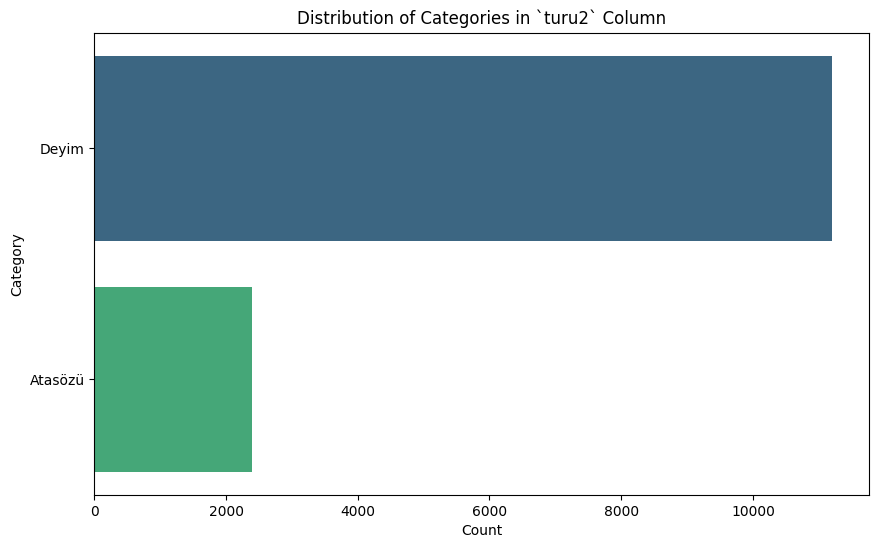

In [25]:
# Categorical analysis for `turu2`
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='turu2', order=df['turu2'].value_counts().index, palette='viridis', hue='turu2', dodge=False)
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Distribution of Categories in `turu2` Column')
plt.legend([], [], frameon=False)
plt.show()